This is for research question 4.

Is there a correlation between a movie’s ending and its success (ratings, box office revenue, etc.)?

We will explore whether happy or tragic endings have any impact on a movie's popularity or financial performance.


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import pickle

# path
DATA_FOLDER = '../../Data/MovieSummaries/'
MOVIE_DATASET = DATA_FOLDER + 'movies_dataset_cleaned.tsv'

# Dataset loading
movies = pd.read_csv(MOVIE_DATASET, sep='\t')


In [ ]:
#movies.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Release year,Movie genres,Movie languages,Movie countries,Score
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,"Thriller, Science Fiction, Horror, Adventure, ...",English Language,United States of America,3.0
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,"Mystery, Biographical film, Drama, Crime Drama",English Language,United States of America,5.0
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,"Short Film, Silent film, Indie, Black-and-whit...","Silent film, English Language",United States of America,3.0
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,"Musical, Comedy, Black-and-white",English Language,United States of America,4.0
4,6631279,/m/0gffwj,Little city,1997-04-04,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997,"Romantic comedy, Ensemble Film, Comedy-drama, ...",English Language,United States of America,4.0


In [5]:
with open('../../Data/MovieSummaries/movie_data_from_tmdb.pkl', 'rb') as file:
    movie_data_from_tmdb = pickle.load(file)

In [6]:
# add vote average and revenue to the dataset
def find_vote_average(movie_data_from_tmdb_single):
    try:
        return movie_data_from_tmdb_single['details']['vote_average']
    except KeyError:
        return pd.NA

def find_revenue(movie_data_from_tmdb_single):
    try:
        return movie_data_from_tmdb_single['details']['revenue']
    except KeyError:
        return pd.NA

movies['vote_average'] = movies['Wikipedia movie ID'].map(lambda x: find_vote_average(movie_data_from_tmdb[x]) if x in movie_data_from_tmdb else pd.NA)
movies['revenue'] = movies['Wikipedia movie ID'].map(lambda x: find_revenue(movie_data_from_tmdb[x]) if x in movie_data_from_tmdb else pd.NA)

In [ ]:
#movies.head()

,Wikipedia movie ID,Freebase movie ID,Movie name,Movie release date,Movie runtime,Movie languages (Freebase ID:name tuples),Movie countries (Freebase ID:name tuples),Movie genres (Freebase ID:name tuples),Release year,Movie genres,Movie languages,Movie countries,Score,vote_average,revenue
0,975900,/m/03vyhn,Ghosts of Mars,2001-08-24,98.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/01jfsb"": ""Thriller"", ""/m/06n90"": ""Science...",2001,"Thriller, Science Fiction, Horror, Adventure, ...",English Language,United States of America,3.0,5.1,14010832
1,3196793,/m/08yl5d,Getting Away with Murder: The JonBenét Ramsey ...,2000-02-16,95.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/02n4kr"": ""Mystery"", ""/m/03bxz7"": ""Biograp...",2000,"Mystery, Biographical film, Drama, Crime Drama",English Language,United States of America,5.0,8.0,0
2,13696889,/m/03cfc81,The Gangsters,1913-05-29,35.0,"{""/m/06ppq"": ""Silent film"", ""/m/02h40lc"": ""Eng...","{""/m/09c7w0"": ""United States of America""}","{""/m/02hmvc"": ""Short Film"", ""/m/06ppq"": ""Silen...",1913,"Short Film, Silent film, Indie, Black-and-whit...","Silent film, English Language",United States of America,3.0,6.0,0
3,10408933,/m/02qc0j7,Alexander's Ragtime Band,1938-08-16,106.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/04t36"": ""Musical"", ""/m/01z4y"": ""Comedy"", ...",1938,"Musical, Comedy, Black-and-white",English Language,United States of America,4.0,6.6,4000000
4,6631279,/m/0gffwj,Little city,1997-04-04,93.0,"{""/m/02h40lc"": ""English Language""}","{""/m/09c7w0"": ""United States of America""}","{""/m/06cvj"": ""Romantic comedy"", ""/m/0hj3n0w"": ...",1997,"Romantic comedy, Ensemble Film, Comedy-drama, ...",English Language,United States of America,4.0,6.0,0


In [8]:
# drop movies without vote average or revenue
movies_filtered = movies.dropna(subset=['vote_average', 'revenue'])

# drop movies with revenue less than 1000
movies_filtered = movies_filtered[movies_filtered['revenue'] > 1000]

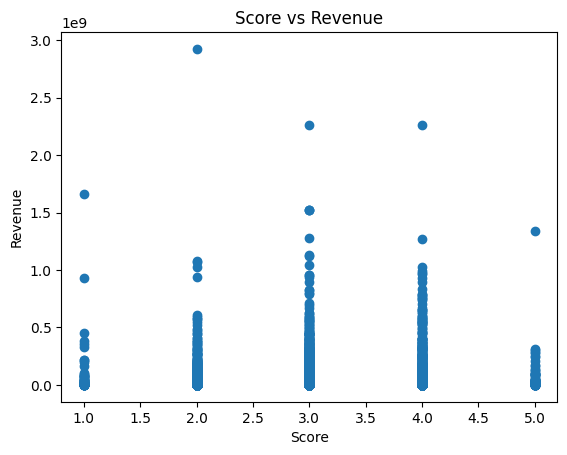

In [10]:
# plot score vs revenue
plt.scatter(movies_filtered['Score'], movies_filtered['revenue'])
plt.xlabel('Score')
plt.ylabel('Revenue')
plt.title('Score vs Revenue')
plt.show()

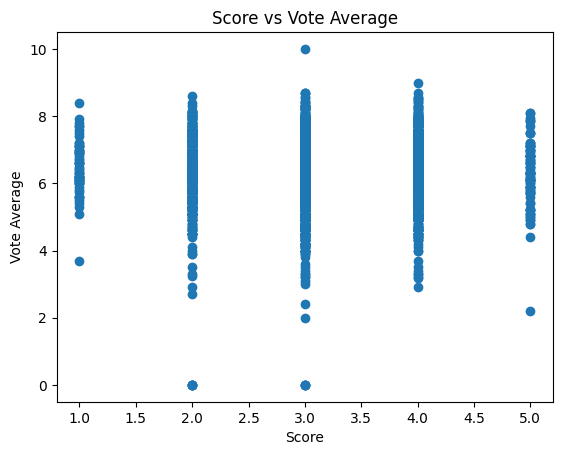

In [11]:
# plot score vs vote average
plt.scatter(movies_filtered['Score'], movies_filtered['vote_average'])
plt.xlabel('Score')
plt.ylabel('Vote Average')
plt.title('Score vs Vote Average')
plt.show()


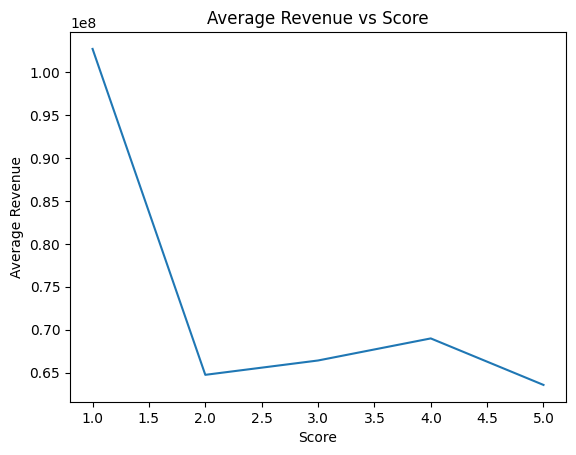

In [12]:
# calculate the average revenue for each score
average_revenue = movies_filtered.groupby('Score')['revenue'].mean()
average_revenue = average_revenue.sort_index()

# plot average revenue vs score
plt.plot(average_revenue)
plt.xlabel('Score')
plt.ylabel('Average Revenue')
plt.title('Average Revenue vs Score')
plt.show()


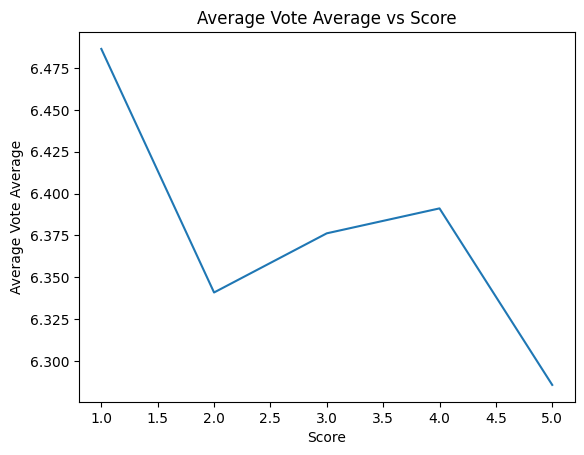

In [13]:
# calculate the average vote average for each score
average_vote_average = movies_filtered.groupby('Score')['vote_average'].mean()
average_vote_average = average_vote_average.sort_index()

# plot average vote average vs score
plt.plot(average_vote_average)
plt.xlabel('Score')
plt.ylabel('Average Vote Average')
plt.title('Average Vote Average vs Score')
plt.show()

In [27]:
# use t test to test if the average revenue is different for movies with score 1 and movies with score 5
from scipy.stats import ttest_ind

movies_score_1_revenue = movies_filtered[movies_filtered['Score'] == 1.0]['revenue'].astype(float)
movies_score_5_revenue = movies_filtered[movies_filtered['Score'] == 5.0]['revenue'].astype(float)

t_stat, p_value = ttest_ind(movies_score_1_revenue, movies_score_5_revenue)

print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('The difference is statistically significant')
else:
    print('The difference is not statistically significant')


t-statistic: 1.1562602712983359
p-value: 0.24946322374935323
The difference is not statistically significant


In [28]:
# use t test to test if the average vote average is different for movies with score 1 and movies with score 5
movies_score_1_vote_average = movies_filtered[movies_filtered['Score'] == 1.0]['vote_average'].astype(float)
movies_score_5_vote_average = movies_filtered[movies_filtered['Score'] == 5.0]['vote_average'].astype(float)

t_stat, p_value = ttest_ind(movies_score_1_vote_average, movies_score_5_vote_average)

print('t-statistic:', t_stat)
print('p-value:', p_value)

if p_value < 0.05:
    print('The difference is statistically significant')
else:
    print('The difference is not statistically significant')

t-statistic: 1.34077133194439
p-value: 0.18207706969048948
The difference is not statistically significant
